In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

def generate_connected_graph(n=1000):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    edges = set()

    # Ensure connectivity by forming a spanning tree
    nodes = list(range(n))
    random.shuffle(nodes)
    for i in range(n - 1):
        edges.add((nodes[i], nodes[i + 1]))

    # Add random edges to maintain connectivity while keeping it random
    while len(edges) < n + random.randint(0, 200):
        u, v = random.sample(range(n), 2)
        if u != v and (u, v) not in edges and (v, u) not in edges:
            edges.add((u, v))

    G.add_edges_from(edges)
    return G

In [2]:
def visualize_graph(G, centrality_scores):
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G, seed=42)

    scores = np.array(list(centrality_scores.values()))
    min_score, max_score = min(scores), max(scores)
    normalized_scores = (scores - min_score) / (max_score - min_score)

    node_colors = [plt.cm.plasma(score) for score in normalized_scores]
    nx.draw(G, pos, node_color=node_colors, node_size=20, edge_color='gray', with_labels=False)
    plt.show()

In [19]:
def visualize_graph_without(G):
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G, seed=42)  

    nx.draw(G, pos, node_color="lightblue", node_size=20, edge_color='gray', with_labels=False)

    plt.show()

In [20]:
G = generate_connected_graph(1000)

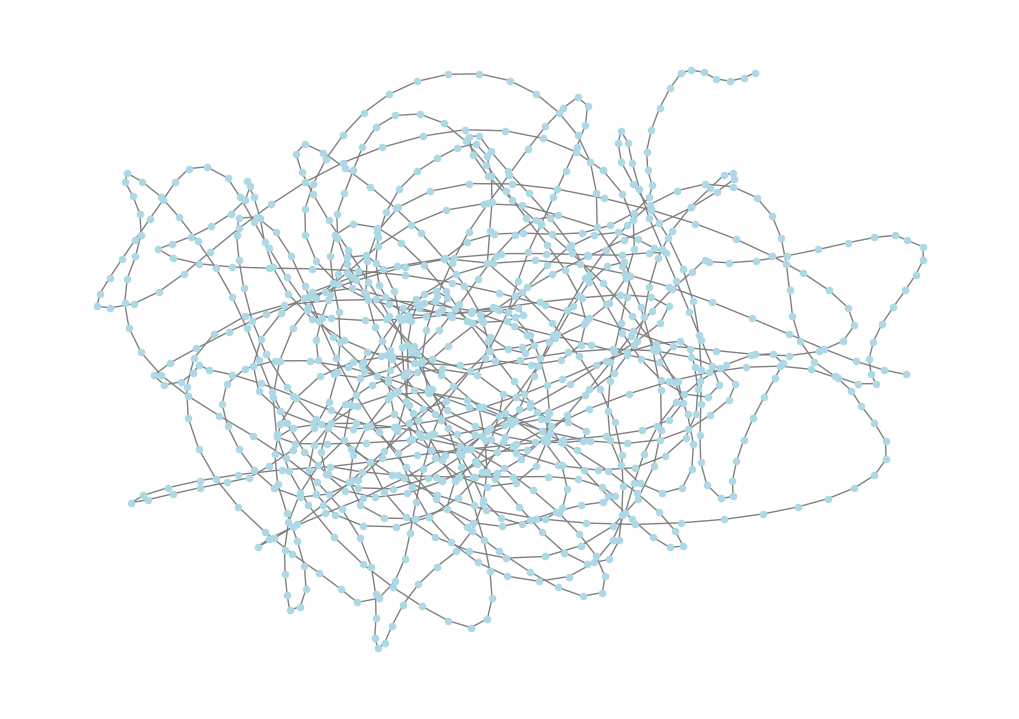

In [21]:
visualize_graph_without(G)

In [22]:
import json

data = nx.node_link_data(G) 
with open("graph.json", "w") as f:
    json.dump(data, f)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


In [ ]:
#We are making a graph with 1000 nodes and connecting the graph by making it a MST
#and then adding random edges
#After making the graph we are exporting it and using that same graph later